# Retail Challenge

### **Contexto**

En un mundo donde las empresas dependen cada vez más de los datos para tomar decisiones estratégicas, la capacidad de segmentar clientes de manera efectiva se vuelve crucial. La segmentación de clientes permite a las empresas personalizar sus estrategias de marketing, mejorar la retención de clientes y maximizar el valor del cliente a lo largo del tiempo.

### **Objetivos**

Este proyecto tiene como objetivo desarrollar una aplicación web interactiva que permita a los científicos de datos realizar análisis de segmentación de clientes utilizando la metodología RFM (Recencia, Frecuencia, Valor Monetario). A través de procesos como lo son:

- Estadística Descriptiva
- Segmentación de Clientes
- Predicción de Abandono
- Valor del cliente a través del tiempo (CTLV)

La metodología de Segmentación de Clientes es una herramienta poderosa que se usa en diferentes industrias, desde la banca, turismo y la industria de consumo masivo. Cada vez las empresas quieren conocer mejor a sus clientes por medio de las diferentes fuentes de datos que
tienen disponibles con la información de estos clientes.


# Índice

- [Descripción de los datos](#Descripción-de-los-datos)

- [Analisis Estadistico Descriptivo](#Analisis-Estadistico-Descriptivo)

- [Visualizaciones](#Visualizaciones)

- [Reporte de resultados](#Reporte-de-resultados)


# Descripción de los datos

- INVOICE_NO : Número de serie de factura
- STOCK_CODE : Número serie del producto
- DESCRIPTION : Descripción del producto
- QUANTITY : Cantidad de compra del producto
- INVOICE_DATE : Fecha y hora de facturación
- UNIT_PRICE : Precio unitario
- CUSTOMER_ID : ID del cliente
- REGION : País de origen de la compra

# Analisis Estadistico Descriptivo

## Carga de dataset.
--- 
Utilizando la librería Pandas de Python cargamos el archivo csv para después obtener una muestra del dataset.
Con el método info() tenemos más información de las columnas, los valores y los tipos de datos que existen.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import plotly.express as px
from datetime import datetime
import plotly.graph_objects as go

In [111]:
df = pd.read_csv(r"Online_Retail.csv", encoding='unicode_escape')
raw = pd.read_csv(r"Online_Retail.csv", encoding='unicode_escape')

In [3]:
df.sample(10)

INVOICE_NO STOCK_CODE                         DESCRIPTION  QUANTITY  \
271636     560711      23301   GARDENERS KNEELING PAD KEEP CALM          1   
57998      541219      22037                 ROBOT BIRTHDAY CARD         1   
250126     559004      21977  PACK OF 60 PINK PAISLEY CAKE CASES        24   
19860      537898      84992      72 SWEETHEART FAIRY CAKE CASES         1   
494894     578278      22597      MUSICAL ZINC HEART DECORATION         10   
124138     546951      21172                   PARTY METAL SIGN          3   
19871      537899      22328  ROUND SNACK BOXES SET OF 4 FRUITS       1488   
441125     574561      22138       BAKING SET 9 PIECE RETROSPOT          1   
39817      539708      22147          FELTCRAFT BUTTERFLY HEARTS         1   
63883      541592      20617         FIRST CLASS PASSPORT COVER          2   

            INVOICE_DATE  UNIT_PRICE  CUSTOMER_ID          REGION  
271636  20/07/2020 12:58        1.65      17841.0  United Kingdom  
57998   14/01/2020 14:06        0.83          NaN  United Kingdom  
250126  05/07/2020 12:23        0.55      12428.0         Finland  
19860   09/12/2019 10:42        0.55      17377.0  United Kingdom  
494894  23/11/2020 13:51        0.29      12748.0  United Kingdom  
124138  18/03/2020 11:30        1.45      17673.0  United Kingdom  
19871   09/12/2019 10:44        2.55      12755.0           Japan  
441125  04/11/2020 15:52       10.79          NaN  United Kingdom  
39817   21/12/2019 12:18        3.36          NaN  United Kingdom  
63883   19/01/2020 15:08        1.63          NaN  United Kingdom

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   INVOICE_NO    541909 non-null  object 
 1   STOCK_CODE    541909 non-null  object 
 2   DESCRIPTION   540455 non-null  object 
 3   QUANTITY      541909 non-null  int64  
 4   INVOICE_DATE  541909 non-null  object 
 5   UNIT_PRICE    541909 non-null  float64
 6   CUSTOMER_ID   406829 non-null  float64
 7   REGION        541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


## Transformacion de tipo de datos.
---
De acuerdo a los resultados obtenidos del método info() se determina cambiar los tipos de datos de las columnas 'INVOICE_DATE' y 'CUSTOMER_ID' para un mejor procesamiento de datos.


In [5]:
df['CUSTOMER_ID'] = df['CUSTOMER_ID'].astype('object')

In [6]:
df['INVOICE_DATE'] = pd.to_datetime(df['INVOICE_DATE'], format="%d/%m/%Y %H:%M")

In [7]:
df['INVOICE_DATE']

0        2019-12-01 08:26:00
1        2019-12-01 08:26:00
2        2019-12-01 08:26:00
3        2019-12-01 08:26:00
4        2019-12-01 08:26:00
                 ...        
541904   2020-12-09 12:50:00
541905   2020-12-09 12:50:00
541906   2020-12-09 12:50:00
541907   2020-12-09 12:50:00
541908   2020-12-09 12:50:00
Name: INVOICE_DATE, Length: 541909, dtype: datetime64[ns]

## Analisis estadistico. 
---
Mediante el método describe() podemos notar que existen valores atípicos como números negativos en las columnas de 'QUANTITY' y 'UNIT_PRICE'.


In [8]:
df.describe().T

count                           mean                  min  \
QUANTITY      541909.0                        9.55225             -80995.0   
INVOICE_DATE    541909  2020-07-04 08:55:02.927097344  2019-12-01 08:26:00   
UNIT_PRICE    541909.0                       4.611114            -11062.06   

                              25%                  50%                  75%  \
QUANTITY                      1.0                  3.0                 10.0   
INVOICE_DATE  2020-03-28 11:34:00  2020-07-19 17:17:00  2020-10-19 11:27:00   
UNIT_PRICE                   1.25                 2.08                 4.13   

                              max         std  
QUANTITY                  80995.0  218.081158  
INVOICE_DATE  2020-12-09 12:50:00         NaN  
UNIT_PRICE                38970.0   96.759853

In [9]:
df.select_dtypes('object').describe().T

count  unique                                 top    freq
INVOICE_NO     541909   25900                              573585    1114
STOCK_CODE     541909    4070                              85123A    2313
DESCRIPTION    540455    4214  WHITE HANGING HEART T-LIGHT HOLDER    2369
CUSTOMER_ID  406829.0  4372.0                             17841.0  7983.0
REGION         541909      38                      United Kingdom  495478

<Axes: xlabel='QUANTITY'>

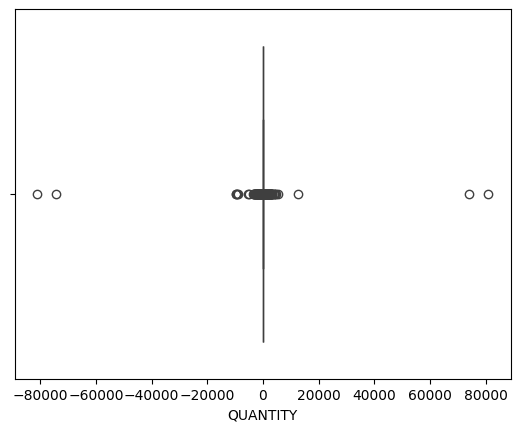

In [10]:
sns.boxplot(x=df['QUANTITY'])

Empleando un diagrama de caja buscamos representar los valores de la columna 'QUANTITY' a través de sus cuartiles y observamos que existen bastantes datos atípicos.

<Axes: xlabel='UNIT_PRICE'>

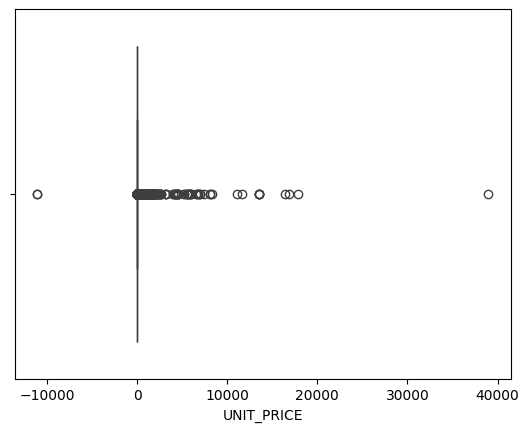

In [11]:
sns.boxplot(x=df['UNIT_PRICE'])

Empleando un diagrama de caja buscamos representar los valores de la columna 'UNIT_PRICE' a través de sus cuartiles y observamos que existen bastantes datos atípicos.

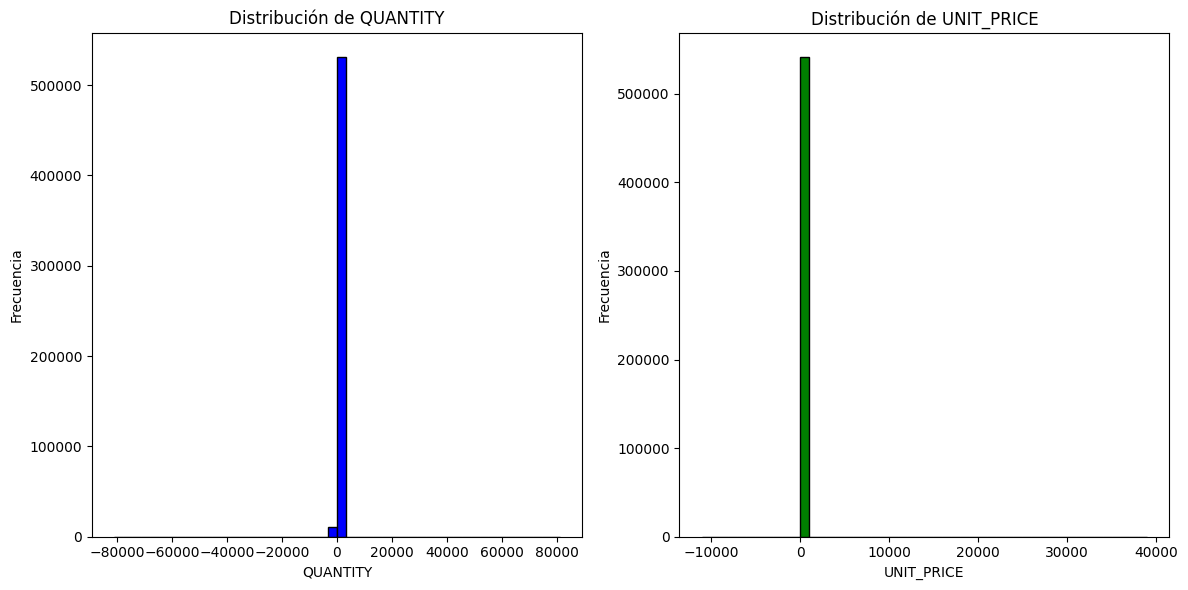

In [12]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(df['QUANTITY'], bins=50, color='blue', edgecolor='black')
plt.title('Distribución de QUANTITY')
plt.xlabel('QUANTITY')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
plt.hist(df['UNIT_PRICE'], bins=50, color='green', edgecolor='black')
plt.title('Distribución de UNIT_PRICE')
plt.xlabel('UNIT_PRICE')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

Usando histogramas representamos la distribución de los valores y notamos que la inmensa mayoria se encuentra dentro de un rango.

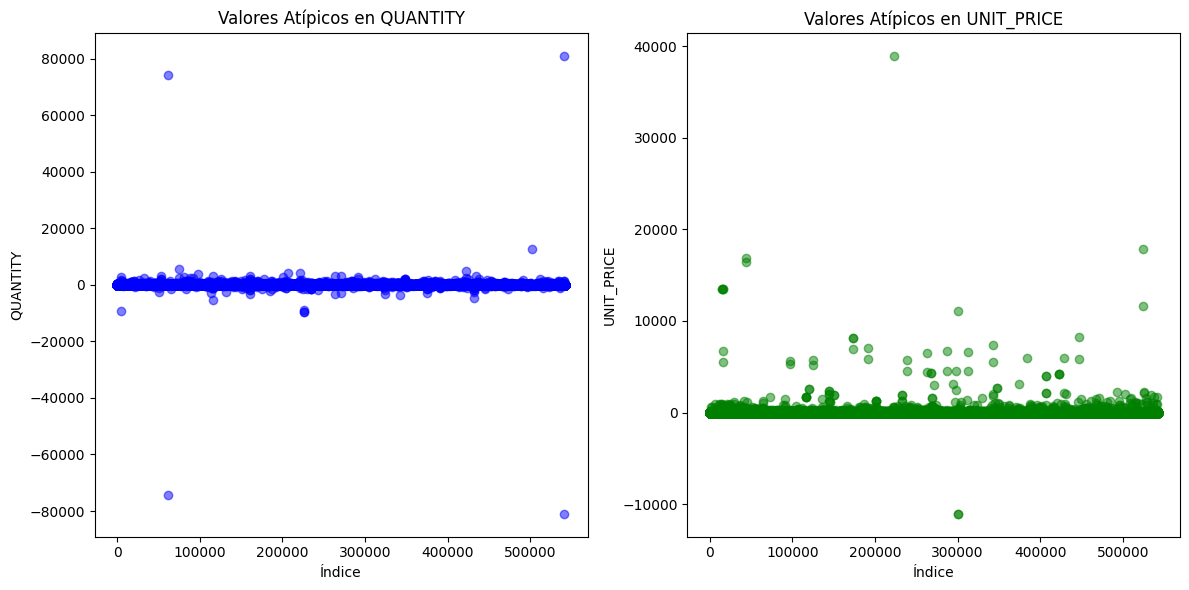

In [13]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(range(len(df)), df['QUANTITY'], alpha=0.5, color='blue')
plt.title('Valores Atípicos en QUANTITY')
plt.xlabel('Índice')
plt.ylabel('QUANTITY')

plt.subplot(1, 2, 2)
plt.scatter(range(len(df)), df['UNIT_PRICE'], alpha=0.5, color='green')
plt.title('Valores Atípicos en UNIT_PRICE')
plt.xlabel('Índice')
plt.ylabel('UNIT_PRICE')

plt.tight_layout()
plt.show()

Con un diagrama de dispersión visualizamos los valores atípicos de forma más especifica. 

## Tratamiendo de valores ausentes.
---
Mediante el método isna() encontramos una gran cantidad de valores ausentes en las columnas 'DESCRIPTION' y 'CUSTOMER_ID' lo cual podría afectar nuestros resultados del analisis, así que utilizando diferentes métodos estos fueron rellenados. 


In [14]:
#Antes 
df.isna().sum()

INVOICE_NO           0
STOCK_CODE           0
DESCRIPTION       1454
QUANTITY             0
INVOICE_DATE         0
UNIT_PRICE           0
CUSTOMER_ID     135080
REGION               0
dtype: int64

In [15]:
df['DESCRIPTION'] = df['DESCRIPTION'].replace('?', 'unknown')

In [16]:
df['DESCRIPTION'].fillna('unknown', inplace=True)

C:\Users\luisP\AppData\Local\Temp\ipykernel_17832\1782370504.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['DESCRIPTION'].fillna('unknown', inplace=True)


In [17]:
df[df['DESCRIPTION']=='unknown']

INVOICE_NO STOCK_CODE DESCRIPTION  QUANTITY        INVOICE_DATE  \
622        536414      22139     unknown        56 2019-12-01 11:52:00   
1970       536545      21134     unknown         1 2019-12-01 14:32:00   
1971       536546      22145     unknown         1 2019-12-01 14:33:00   
1972       536547      37509     unknown         1 2019-12-01 14:33:00   
1987       536549     85226A     unknown         1 2019-12-01 14:34:00   
...           ...        ...         ...       ...                 ...   
535322     581199      84581     unknown        -2 2020-12-07 18:26:00   
535326     581203      23406     unknown        15 2020-12-07 18:31:00   
535332     581209      21620     unknown         6 2020-12-07 18:35:00   
536981     581234      72817     unknown        27 2020-12-08 10:33:00   
538554     581408      85175     unknown        20 2020-12-08 14:06:00   

        UNIT_PRICE CUSTOMER_ID          REGION  
622            0.0         NaN  United Kingdom  
1970           0.0         NaN  United Kingdom  
1971           0.0         NaN  United Kingdom  
1972           0.0         NaN  United Kingdom  
1987           0.0         NaN  United Kingdom  
...            ...         ...             ...  
535322         0.0         NaN  United Kingdom  
535326         0.0         NaN  United Kingdom  
535332         0.0         NaN  United Kingdom  
536981         0.0         NaN  United Kingdom  
538554         0.0         NaN  United Kingdom  

[1501 rows x 8 columns]

In [18]:
100*df[df['DESCRIPTION']=='unknown']['INVOICE_NO'].count()/df.shape[0]

0.2769837740284808

In [19]:
df.drop(df[df['DESCRIPTION']=='unknown'].index,axis=0,inplace=True)

Después de encontrar los valores ausentes, reemplazamos '?' de la columna 'DESCRIPTION' por la palabra 'unknown' y rellenamos espacios vacíos con la misma, para luego sacar el porcentaje de los datos 'unknown' y llegar a la conclusión de que mejor era eliminarlos. 

In [20]:
df[df['CUSTOMER_ID'].isna()]

INVOICE_NO STOCK_CODE                      DESCRIPTION  QUANTITY  \
1443       536544      21773  DECORATIVE ROSE BATHROOM BOTTLE         1   
1444       536544      21774  DECORATIVE CATS BATHROOM BOTTLE         2   
1445       536544      21786               POLKADOT RAIN HAT          4   
1446       536544      21787            RAIN PONCHO RETROSPOT         2   
1447       536544      21790               VINTAGE SNAP CARDS         9   
...           ...        ...                              ...       ...   
541536     581498     85099B          JUMBO BAG RED RETROSPOT         5   
541537     581498     85099C   JUMBO  BAG BAROQUE BLACK WHITE         4   
541538     581498      85150    LADIES & GENTLEMEN METAL SIGN         1   
541539     581498      85174                S/4 CACTI CANDLES         1   
541540     581498        DOT                   DOTCOM POSTAGE         1   

              INVOICE_DATE  UNIT_PRICE CUSTOMER_ID          REGION  
1443   2019-12-01 14:32:00        2.51         NaN  United Kingdom  
1444   2019-12-01 14:32:00        2.51         NaN  United Kingdom  
1445   2019-12-01 14:32:00        0.85         NaN  United Kingdom  
1446   2019-12-01 14:32:00        1.66         NaN  United Kingdom  
1447   2019-12-01 14:32:00        1.66         NaN  United Kingdom  
...                    ...         ...         ...             ...  
541536 2020-12-09 10:26:00        4.13         NaN  United Kingdom  
541537 2020-12-09 10:26:00        4.13         NaN  United Kingdom  
541538 2020-12-09 10:26:00        4.96         NaN  United Kingdom  
541539 2020-12-09 10:26:00       10.79         NaN  United Kingdom  
541540 2020-12-09 10:26:00     1714.17         NaN  United Kingdom  

[133579 rows x 8 columns]

In [21]:
100*df['CUSTOMER_ID'].isna().sum()/df.shape[0]

24.71817589672988

In [22]:

df['CUSTOMER_ID'].fillna(0, inplace=True)

C:\Users\luisP\AppData\Local\Temp\ipykernel_17832\2846605289.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CUSTOMER_ID'].fillna(0, inplace=True)
C:\Users\luisP\AppData\Local\Temp\ipykernel_17832\2846605289.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['CUSTOMER_ID'].fillna(0, inplace=True)


In [23]:
#Después 
df.isna().sum()

INVOICE_NO      0
STOCK_CODE      0
DESCRIPTION     0
QUANTITY        0
INVOICE_DATE    0
UNIT_PRICE      0
CUSTOMER_ID     0
REGION          0
dtype: int64

Posteriormente, buscamos el porcentaje de datos ausentes de la columna 'CUSTOMER_ID' y de acuerdo al resultado nos percatamos que no era adecuado eliminarlos. Seguido los valores ausentes fueron reemplazados por 0.

## Tratamiento de duplicados.
---
Con el método drop_duplicates() borramos las filas duplicadas del dataset. 

In [24]:
df = df.drop_duplicates().reset_index(drop=True)

In [25]:
df.duplicated().sum()

0

### Quantity
---
Filtramos los valores de la columna 'QUANTITY' para encontrar los datos menores a -2000.

In [26]:
df[df['QUANTITY'] < -2000]

INVOICE_NO STOCK_CODE                          DESCRIPTION  QUANTITY  \
4216      C536757      84347  ROTATING SILVER ANGELS T-LIGHT HLDR     -9360   
50161      540564      22617                  mouldy thrown away.     -2600   
60844     C541433      23166       MEDIUM CERAMIC TOP STORAGE JAR    -74215   
112219     545990      84598                                check     -3000   
114433     546152     72140F                           throw away     -5368   
129826     547560      72732               thrown away-can't sell     -2472   
158057    C550456      21108   FAIRY CAKE FLANNEL ASSORTED COLOUR     -3114   
182747     552733      23059                    Thrown away-rusty     -2376   
222766     556687      23003         Printing smudges/thrown away     -9058   
222767     556690      23005         printing smudges/thrown away     -9600   
222768     556691      23005         printing smudges/thrown away     -9600   
260766     560039      20713         wrongly marked. 23343 in box     -3100   
371215     569466      23270               incorrect stock entry.     -2880   
426346     573593    79323LP                Unsaleable destroyed.     -2618   
426347     573594     79323P                Unsaleable destroyed.     -2003   
426349     573596     79323W                Unsaleable destroyed.     -4830   
533660    C581484      23843           PAPER CRAFT  LITTLE BIRDIE    -80995   

              INVOICE_DATE  UNIT_PRICE  CUSTOMER_ID          REGION  
4216   2019-12-02 14:23:00        0.03      15838.0  United Kingdom  
50161  2020-01-10 10:36:00        0.00          0.0  United Kingdom  
60844  2020-01-18 10:17:00        1.04      12346.0  United Kingdom  
112219 2020-03-08 13:07:00        0.00          0.0  United Kingdom  
114433 2020-03-09 17:25:00        0.00          0.0  United Kingdom  
129826 2020-03-23 17:28:00        0.00          0.0  United Kingdom  
158057 2020-04-18 13:08:00        2.10      15749.0  United Kingdom  
182747 2020-05-11 10:48:00        0.00          0.0  United Kingdom  
222766 2020-06-14 10:36:00        0.00          0.0  United Kingdom  
222767 2020-06-14 10:37:00        0.00          0.0  United Kingdom  
222768 2020-06-14 10:37:00        0.00          0.0  United Kingdom  
260766 2020-07-14 14:27:00        0.00          0.0  United Kingdom  
371215 2020-10-04 11:42:00        0.00          0.0  United Kingdom  
426346 2020-10-31 15:16:00        0.00          0.0  United Kingdom  
426347 2020-10-31 15:16:00        0.00          0.0  United Kingdom  
426349 2020-10-31 15:17:00        0.00          0.0  United Kingdom  
533660 2020-12-09 09:27:00        2.08      16446.0  United Kingdom

In [27]:
100*df[df['QUANTITY'] <=0]['INVOICE_NO'].count()/df.shape[0]

1.8096199125462495

In [28]:
#Eliminamos los datos dado que el porcentage es menor
df.drop(df[df['QUANTITY'] <= 0]['QUANTITY'].index,axis=0,inplace=True)

Enseguida, averiguamos el porcentaje de los valores negativos en la columna 'QUANTITY', por lo cual decidimos descartar todos los números menores a 0.

In [29]:
df[df['QUANTITY'] > 3000]

INVOICE_NO STOCK_CODE                          DESCRIPTION  QUANTITY  \
52005      540815      21108   FAIRY CAKE FLANNEL ASSORTED COLOUR      3114   
60839      541431      23166       MEDIUM CERAMIC TOP STORAGE JAR     74215   
96207      544612      22053                EMPIRE DESIGN ROSETTE      3906   
158456     550461      21108   FAIRY CAKE FLANNEL ASSORTED COLOUR      3114   
203564     554868      22197                 SMALL POPCORN HOLDER      4300   
260767     560040      23343                  came coded as 20713      3100   
267686     560599      18007  ESSENTIAL BALM 3.5g TIN IN ENVELOPE      3186   
416713     573008      84077    WORLD WAR 2 GLIDERS ASSTD DESIGNS      4800   
495915     578841      84826       ASSTD DESIGN 3D PAPER STICKERS     12540   
533659     581483      23843           PAPER CRAFT  LITTLE BIRDIE     80995   

              INVOICE_DATE  UNIT_PRICE  CUSTOMER_ID          REGION  
52005  2020-01-11 12:55:00        2.10      15749.0  United Kingdom  
60839  2020-01-18 10:01:00        1.04      12346.0  United Kingdom  
96207  2020-02-22 10:43:00        0.82      18087.0  United Kingdom  
158456 2020-04-18 13:20:00        2.10      15749.0  United Kingdom  
203564 2020-05-27 10:52:00        0.72      13135.0  United Kingdom  
260767 2020-07-14 14:28:00        0.00          0.0  United Kingdom  
267686 2020-07-19 17:04:00        0.06      14609.0  United Kingdom  
416713 2020-10-27 12:26:00        0.21      12901.0  United Kingdom  
495915 2020-11-25 15:57:00        0.00      13256.0  United Kingdom  
533659 2020-12-09 09:15:00        2.08      16446.0  United Kingdom

In [30]:
100*df[df['QUANTITY'] > 3000]['INVOICE_NO'].count()/df.shape[0]

0.0019031089187296368

In [31]:
df.drop(df[df['QUANTITY'] > 3000]['QUANTITY'].index,axis=0,inplace=True)

### Unit Price
---
Filtramos los valores de la columna 'UNIT_PRICE' para encontrar los datos menores o igual 0.

In [32]:
df[df['UNIT_PRICE'] <= 0].sample(20)

INVOICE_NO STOCK_CODE                          DESCRIPTION  QUANTITY  \
40828      539856      84692          BOX OF 24 COCKTAIL PARASOLS         2   
191151     553539      22665    RECIPE BOX BLUE SKETCHBOOK DESIGN         1   
239500     558340      22526            WHEELBARROW FOR CHILDREN          1   
46017      540356      20724          RED RETROSPOT CHARLOTTE BAG         1   
310085     564530      22685        FRENCH BLUE METAL DOOR SIGN 0         3   
427631     573885      22689                   had been put aside        40   
263922     560283      22624                 IVORY KITCHEN SCALES        12   
14020      537534      84832     ZINC WILLIE WINKIE  CANDLE STICK         1   
40866      539856      22372  AIRLINE BAG VINTAGE WORLD CHAMPION          1   
310062     564530      22679        FRENCH BLUE METAL DOOR SIGN 4         3   
351335     567920     84875D                                found         5   
40832      539856      22843            BISCUIT TIN VINTAGE GREEN         1   
364004     568946      22740                           adjustment        89   
310063     564530      22678        FRENCH BLUE METAL DOOR SIGN 3         3   
473158     577117      22149                                check        34   
264465     560358      35965                               dotcom        26   
14051      537534      22371         AIRLINE BAG VINTAGE TOKYO 78         5   
185234     553000      47566                        PARTY BUNTING         4   
333921     566476      23084  add stock to allocate online orders         2   
191135     553539      22301         COFFEE MUG CAT + BIRD DESIGN         1   

              INVOICE_DATE  UNIT_PRICE  CUSTOMER_ID          REGION  
40828  2019-12-22 14:41:00         0.0          0.0  United Kingdom  
191151 2020-05-17 15:27:00         0.0          0.0  United Kingdom  
239500 2020-06-28 14:01:00         0.0          0.0  United Kingdom  
46017  2020-01-06 15:12:00         0.0          0.0  United Kingdom  
310085 2020-08-25 14:57:00         0.0          0.0  United Kingdom  
427631 2020-11-01 13:26:00         0.0          0.0  United Kingdom  
263922 2020-07-18 08:32:00         0.0          0.0            EIRE  
14020  2019-12-07 11:48:00         0.0          0.0  United Kingdom  
40866  2019-12-22 14:41:00         0.0          0.0  United Kingdom  
310062 2020-08-25 14:57:00         0.0          0.0  United Kingdom  
351335 2020-09-22 17:21:00         0.0          0.0  United Kingdom  
40832  2019-12-22 14:41:00         0.0          0.0  United Kingdom  
364004 2020-09-29 15:01:00         0.0          0.0  United Kingdom  
310063 2020-08-25 14:57:00         0.0          0.0  United Kingdom  
473158 2020-11-17 18:04:00         0.0          0.0  United Kingdom  
264465 2020-07-18 11:46:00         0.0          0.0  United Kingdom  
14051  2019-12-07 11:48:00         0.0          0.0  United Kingdom  
185234 2020-05-12 15:21:00         0.0      17667.0  United Kingdom  
333921 2020-09-13 09:01:00         0.0          0.0  United Kingdom  
191135 2020-05-17 15:27:00         0.0          0.0  United Kingdom

In [33]:
100*df[df['UNIT_PRICE'] <= 0]['INVOICE_NO'].count()/df.shape[0]

0.1096211599288985

In [34]:
#Dado que el porcentaje es bajo elimnamos estos datos
df.drop(df[df['UNIT_PRICE'] <= 0]['UNIT_PRICE'].index,axis=0,inplace=True)

In [35]:
100*df[df['UNIT_PRICE'] > 4000]['INVOICE_NO'].count()/df.shape[0]

0.001333663573837331

In [36]:
#Dado que el porcentaje es bajo elimnamos estos datos
df.drop(df[df['UNIT_PRICE'] > 4000]['UNIT_PRICE'].index,axis=0,inplace=True)

Enseguida, averiguamos el porcentaje de los valores menores o igual a 0 en la columna 'UNIT_PRICE', por lo cual decidimos descartarlos.

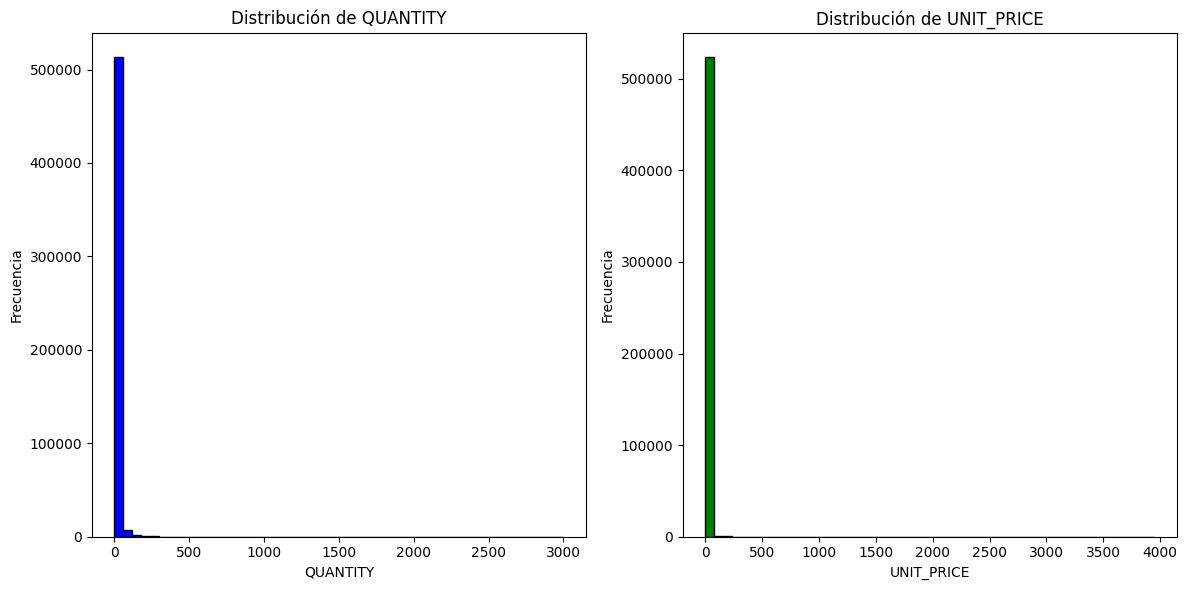

In [37]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(df['QUANTITY'], bins=50, color='blue', edgecolor='black')
plt.title('Distribución de QUANTITY')
plt.xlabel('QUANTITY')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
plt.hist(df['UNIT_PRICE'], bins=50, color='green', edgecolor='black')
plt.title('Distribución de UNIT_PRICE')
plt.xlabel('UNIT_PRICE')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

Comprobamos nuevamente con histogramas la ausencia de valores negativos. 

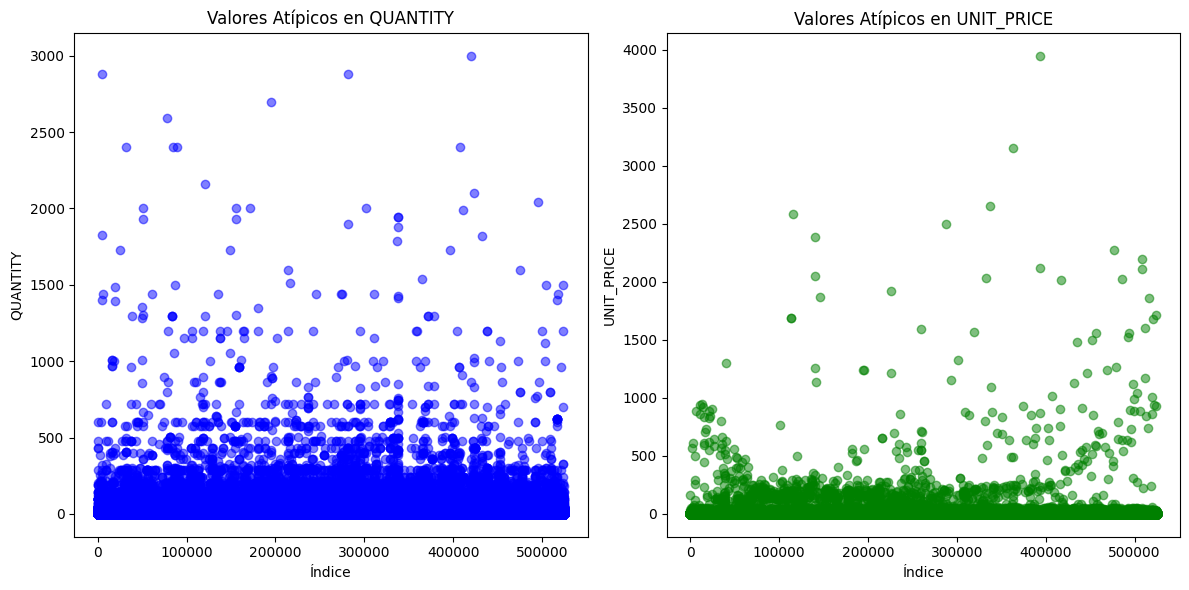

In [38]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(range(len(df)), df['QUANTITY'], alpha=0.5, color='blue')
plt.title('Valores Atípicos en QUANTITY')
plt.xlabel('Índice')
plt.ylabel('QUANTITY')

plt.subplot(1, 2, 2)
plt.scatter(range(len(df)), df['UNIT_PRICE'], alpha=0.5, color='green')
plt.title('Valores Atípicos en UNIT_PRICE')
plt.xlabel('Índice')
plt.ylabel('UNIT_PRICE')

plt.tight_layout()
plt.show()

Con la ayuda de un diagrama de dispersión corroboramos que ya no existen valores atípicos. 

## Segmentacion por grupos.
---
Creamos nuevas columnas 'DAY', 'MONTH' y 'YEAR' para ser más especificos en las fechas. Adicionalmente, agregamos la columna 'TOTAL_REVENUE' para generar el total de las ganancias obtenidas por las compras.  

In [39]:
df['TOTAL_REVENUE'] = df['QUANTITY'] * df['UNIT_PRICE']

df['MONTH'] = df['INVOICE_DATE'].dt.month
df['YEAR'] = df['INVOICE_DATE'].dt.year
df['DAY_OF_WEEK'] = df['INVOICE_DATE'].dt.day_of_week

df.sample(10)

INVOICE_NO STOCK_CODE                        DESCRIPTION  QUANTITY  \
94361      544460      21069          VINTAGE BILLBOARD TEA MUG         3   
398399     571544      23320       GIANT 50'S CHRISTMAS CRACKER         1   
254130     559517      22271               FELTCRAFT DOLL ROSIE         1   
221080     556494     85049F                 BABY BOOM RIBBONS          3   
345755     567524      22727          ALARM CLOCK BAKELIKE RED          4   
379417     570087     84997c    CHILDRENS CUTLERY POLKADOT BLUE         2   
189975     553410      84987    SET OF 36 TEATIME PAPER DOILIES        12   
360358     568661      22720  SET OF 3 CAKE TINS PANTRY DESIGN          2   
419047     573174      23368  SET 12 COLOUR PENCILS DOLLY GIRL          1   
184265     552875      23202             JUMBO BAG VINTAGE LEAF        10   

              INVOICE_DATE  UNIT_PRICE  CUSTOMER_ID          REGION  \
94361  2020-02-20 14:01:00        1.25      16931.0  United Kingdom   
398399 2020-10-17 16:53:00        2.89      17757.0  United Kingdom   
254130 2020-07-08 16:11:00        5.79          0.0  United Kingdom   
221080 2020-06-12 14:57:00        1.25      17802.0  United Kingdom   
345755 2020-09-21 08:55:00        3.75      15696.0  United Kingdom   
379417 2020-10-07 11:26:00        8.29          0.0  United Kingdom   
189975 2020-05-17 09:24:00        1.45      14320.0  United Kingdom   
360358 2020-09-28 12:34:00        4.95      18109.0  United Kingdom   
419047 2020-10-28 10:25:00        0.65          0.0  United Kingdom   
184265 2020-05-12 09:41:00        2.08      12621.0         Germany   

        TOTAL_REVENUE  MONTH  YEAR  DAY_OF_WEEK  
94361            3.75      2  2020            3  
398399           2.89     10  2020            5  
254130           5.79      7  2020            2  
221080           3.75      6  2020            4  
345755          15.00      9  2020            0  
379417          16.58     10  2020            2  
189975          17.40      5  2020            6  
360358           9.90      9  2020            0  
419047           0.65     10  2020            2  
184265          20.80      5  2020            1

# Métricas


##  Frequency. 
---

Esta métrica se puede construir contando el número de compras que un cliente ha hecho, puede ser por compra, o por producto, depende del enfoque que uno le 
quiera dar

---
<-TODO->Agregar la columna frequency para el clusterizado


In [40]:
top_10_products = df.groupby('DESCRIPTION')['QUANTITY'].sum().sort_values(ascending=False).head(10)
fig_coun=px.bar(top_10_products,x=top_10_products.index,y='QUANTITY',barmode='group',title='Top 10 articulos mas vendidos',template='simple_white')
fig_coun.show()

Por medio de métodos de filtración y agrupación pudimos obtener el top 10 de los artículos más vendidos.

In [41]:
#Cambio de tipo de datos 
df['CUSTOMER_ID']=df['CUSTOMER_ID'].astype('int')
df['CUSTOMER_ID']=df['CUSTOMER_ID'].astype('str')

In [42]:
top_10_products = df.groupby(['CUSTOMER_ID'])['INVOICE_NO'].count().sort_values(ascending=False).head(10)
fig_coun=px.bar(top_10_products,x=top_10_products.index,y='INVOICE_NO',barmode='group',title='Top 10 clientes', template= 'simple_white')
fig_coun.update_layout(xaxis_title='Fecha')
fig_coun.show()

Por medio de métodos de filtración y agrupación pudimos obtener el top 10 de los clientes con mayor fidelidad. 

### Frecuencia por orden de compra


In [43]:
df_freq=df[df['CUSTOMER_ID']!='0']

In [44]:
df_freq.sort_values('INVOICE_NO')

INVOICE_NO STOCK_CODE                          DESCRIPTION  QUANTITY  \
0          536365     85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1          536365      71053                  WHITE METAL LANTERN         6   
2          536365     84406B       CREAM CUPID HEARTS COAT HANGER         8   
3          536365     84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4          536365     84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...           ...        ...                                  ...       ...   
535127     581587      22555            PLASTERS IN TIN STRONGMAN        12   
535126     581587      22556       PLASTERS IN TIN CIRCUS PARADE         12   
535138     581587      23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
535131     581587      22730           ALARM CLOCK BAKELIKE IVORY         4   
535139     581587      22138        BAKING SET 9 PIECE RETROSPOT          3   

              INVOICE_DATE  UNIT_PRICE CUSTOMER_ID          REGION  \
0      2019-12-01 08:26:00        2.55       17850  United Kingdom   
1      2019-12-01 08:26:00        3.39       17850  United Kingdom   
2      2019-12-01 08:26:00        2.75       17850  United Kingdom   
3      2019-12-01 08:26:00        3.39       17850  United Kingdom   
4      2019-12-01 08:26:00        3.39       17850  United Kingdom   
...                    ...         ...         ...             ...   
535127 2020-12-09 12:50:00        1.65       12680          France   
535126 2020-12-09 12:50:00        1.65       12680          France   
535138 2020-12-09 12:50:00        4.15       12680          France   
535131 2020-12-09 12:50:00        3.75       12680          France   
535139 2020-12-09 12:50:00        4.95       12680          France   

        TOTAL_REVENUE  MONTH  YEAR  DAY_OF_WEEK  
0               15.30     12  2019            6  
1               20.34     12  2019            6  
2               22.00     12  2019            6  
3               20.34     12  2019            6  
4               20.34     12  2019            6  
...               ...    ...   ...          ...  
535127          19.80     12  2020            2  
535126          19.80     12  2020            2  
535138          16.60     12  2020            2  
535131          15.00     12  2020            2  
535139          14.85     12  2020            2  

[392681 rows x 12 columns]

In [45]:
df_frequency=df_freq.groupby(['CUSTOMER_ID'],as_index=False)['INVOICE_NO'].count()
fig = px.histogram(df_frequency, x="INVOICE_NO",template='simple_white', title='Distribución de facturas por cliente')
fig.show()

Distribución de facturas por clientes que tienen asignado un número ID.

In [46]:
df_frequency = df_frequency.rename(columns={'INVOICE_NO': 'FREQUENCY'})

In [47]:
df=df.merge(df_frequency,on='CUSTOMER_ID')


##  Monetary. 
---
Esta métrica es la más sencilla, representa simplemente el monto en dinero invertido por el cliente comprando un producto.

In [48]:
top_10_products = df.groupby('CUSTOMER_ID')['TOTAL_REVENUE'].sum().sort_values(ascending=False).head(10)

fig_coun=px.bar(top_10_products,x=top_10_products.index,y='TOTAL_REVENUE',barmode='group',title='Top 10 clientes con mayor monto de compra',template='simple_white')
fig_coun.show()

### Histograma de ganancias

In [49]:
df_mon=df[df['CUSTOMER_ID']!='0']

In [50]:
df_monetary=df_mon.groupby(['CUSTOMER_ID'],as_index=False)['TOTAL_REVENUE'].sum()
fig = px.histogram(df_monetary, x="TOTAL_REVENUE",template='simple_white')
fig.show()

In [51]:
top_10_products = df.groupby('DESCRIPTION')['TOTAL_REVENUE'].sum().sort_values(ascending=False).head(10)

fig_coun=px.bar(top_10_products,x=top_10_products.index,y='TOTAL_REVENUE',barmode='group',title='Top 10 articulos con mayor ganancia',template='simple_white')
fig_coun.show()

## Recency. 
---
Esta métrica se puede construir tomando como base el día actual y a este restar los días hasta la última fecha de compra del cliente, puede ser días, semanas, años, esto depende del tipo de industria y la frecuencia promedio de compra (las personas no compran un auto nuevo cada 2 semanas, o tal vez sí, pero no las conocemos). Así que puedes usar la última fecha de compra del conjunto de datos como parámetro para estimar la diferencia de días del resto de compras.

In [52]:
df_dates = df.sort_values('INVOICE_DATE')

df_dates.head()

INVOICE_NO STOCK_CODE                          DESCRIPTION  QUANTITY  \
0     536365     85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1     536365      71053                  WHITE METAL LANTERN         6   
2     536365     84406B       CREAM CUPID HEARTS COAT HANGER         8   
3     536365     84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4     536365     84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

         INVOICE_DATE  UNIT_PRICE CUSTOMER_ID          REGION  TOTAL_REVENUE  \
0 2019-12-01 08:26:00        2.55       17850  United Kingdom          15.30   
1 2019-12-01 08:26:00        3.39       17850  United Kingdom          20.34   
2 2019-12-01 08:26:00        2.75       17850  United Kingdom          22.00   
3 2019-12-01 08:26:00        3.39       17850  United Kingdom          20.34   
4 2019-12-01 08:26:00        3.39       17850  United Kingdom          20.34   

   MONTH  YEAR  DAY_OF_WEEK  FREQUENCY  
0     12  2019            6        297  
1     12  2019            6        297  
2     12  2019            6        297  
3     12  2019            6        297  
4     12  2019            6        297

In [53]:
orders_per_month= df_dates.groupby('MONTH').agg({'CUSTOMER_ID':'nunique','TOTAL_REVENUE':'sum'})

orders_per_month['Orders_per_user'] = orders_per_month['TOTAL_REVENUE']/ orders_per_month['CUSTOMER_ID'] 
orders_per_month.sort_index(ascending=False,inplace=True)
print(orders_per_month.head(12))
print()
mean_orders= orders_per_month['Orders_per_user'].mean()
print('Promedio de compra por mes:',mean_orders)


       CUSTOMER_ID  TOTAL_REVENUE  Orders_per_user
MONTH                                             
12            1264     919143.570       727.170546
11            1664    1156205.610       694.835102
10            1364    1026312.330       752.428394
9             1266     950690.202       750.940128
8              935     644051.040       688.824642
7              948     598771.741       631.615761
6              991     660046.050       666.040414
5             1055     666116.400       631.389953
4              856     461834.931       539.526789
3              974     594081.760       609.940205
2              757     442882.000       585.048877
1              740     484378.310       654.565284

Promedio de compra por mes: 661.0271744875253


In [54]:
fig_coun=px.bar(orders_per_month,x=orders_per_month.index,y='TOTAL_REVENUE',barmode='group',title='Ganancias por mes',template='simple_white')
fig_coun.show()

In [55]:
fig = px.histogram(orders_per_month, x="Orders_per_user",template='simple_white')
fig.show()

### Dias sin comprar

In [56]:
df_recency=df.groupby(['CUSTOMER_ID'],as_index=False)['INVOICE_DATE'].max()
df_recency['RECENCY']=(datetime.now()-df_recency['INVOICE_DATE']).dt.days
df_recency

CUSTOMER_ID        INVOICE_DATE  RECENCY
0          12347 2020-12-07 15:52:00     1305
1          12348 2020-09-25 13:13:00     1378
2          12349 2020-11-21 09:51:00     1321
3          12350 2020-02-02 16:01:00     1614
4          12352 2020-11-03 14:37:00     1339
...          ...                 ...      ...
4331       18280 2020-03-07 09:52:00     1580
4332       18281 2020-06-12 10:53:00     1483
4333       18282 2020-12-02 11:43:00     1310
4334       18283 2020-12-06 12:02:00     1306
4335       18287 2020-10-28 09:29:00     1345

[4336 rows x 3 columns]

In [57]:
df=df.merge(df_recency,on='CUSTOMER_ID')

In [58]:
df.drop(['INVOICE_DATE_y'],axis=1,inplace=True)

In [59]:
df.head()

INVOICE_NO STOCK_CODE                          DESCRIPTION  QUANTITY  \
0     536365     85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1     536365      71053                  WHITE METAL LANTERN         6   
2     536365     84406B       CREAM CUPID HEARTS COAT HANGER         8   
3     536365     84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4     536365     84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

       INVOICE_DATE_x  UNIT_PRICE CUSTOMER_ID          REGION  TOTAL_REVENUE  \
0 2019-12-01 08:26:00        2.55       17850  United Kingdom          15.30   
1 2019-12-01 08:26:00        3.39       17850  United Kingdom          20.34   
2 2019-12-01 08:26:00        2.75       17850  United Kingdom          22.00   
3 2019-12-01 08:26:00        3.39       17850  United Kingdom          20.34   
4 2019-12-01 08:26:00        3.39       17850  United Kingdom          20.34   

   MONTH  YEAR  DAY_OF_WEEK  FREQUENCY  RECENCY  
0     12  2019            6        297     1676  
1     12  2019            6        297     1676  
2     12  2019            6        297     1676  
3     12  2019            6        297     1676  
4     12  2019            6        297     1676

In [60]:
df_recency_merged=df[df['CUSTOMER_ID']!='0']

In [61]:
fig = px.histogram(df_recency_merged, x="RECENCY",template='simple_white')
fig.show()

## ¿Cúal es el país donde más se vende?

In [62]:
df_country=df.groupby(['REGION'],as_index=False)['TOTAL_REVENUE'].sum().sort_values(by='TOTAL_REVENUE',ascending=False)
top_10_country=df_country.head(10)
fig_coun=px.bar(top_10_country,x='REGION',y='TOTAL_REVENUE',barmode='group',title='Ventas por país',template='simple_white')
fig_coun.show()

In [63]:
fig = px.choropleth(
    df_country,
    locations='REGION',          # Nombre de la columna con los nombres de los países
    locationmode='country names', # Modo de localización basado en los nombres de los países
    color='TOTAL_REVENUE',                # Nombre de la columna con los valores a graficar
    hover_name='REGION',         # Nombre de la columna para el tooltip
    color_continuous_scale=px.colors.sequential.Plasma,  # Escala de colores
    scope='world'
)

# Título del gráfico
fig.update_layout(
    title_text='Valores por País',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'),
    width=800,  # Ancho del gráfico
    height=600,  # Alto del gráfico
    margin=dict(l=0, r=0, t=50, b=0)  # Margenes del gráfico
    
)

# Mostrar el gráfico
fig.show()

In [64]:
fig = px.choropleth(
    df_country,
    locations='REGION',          # Nombre de la columna con los nombres de los países
    locationmode='country names', # Modo de localización basado en los nombres de los países
    color='TOTAL_REVENUE',                # Nombre de la columna con los valores a graficar
    hover_name='REGION',         # Nombre de la columna para el tooltip
    color_continuous_scale=px.colors.sequential.Plasma,  # Escala de colores
    scope='europe'
)

# Título del gráfico
fig.update_layout(
    title_text='Valores por País',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'),
    width=800,  # Ancho del gráfico
    height=600,  # Alto del gráfico
    margin=dict(l=0, r=0, t=50, b=0)  # Margenes del gráfico
    
)

# Mostrar el gráfico
fig.show()

In [65]:
fig = px.choropleth(
    df_country,
    locations='REGION',          # Nombre de la columna con los nombres de los países
    locationmode='country names', # Modo de localización basado en los nombres de los países
    color='TOTAL_REVENUE',                # Nombre de la columna con los valores a graficar
    hover_name='REGION',         # Nombre de la columna para el tooltip
    color_continuous_scale=px.colors.sequential.Plasma,  # Escala de colores
    scope='north america'
)

# Título del gráfico
fig.update_layout(
    title_text='Valores por País',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'),
    width=800,  # Ancho del gráfico
    height=600,  # Alto del gráfico
    margin=dict(l=0, r=0, t=50, b=0)  # Margenes del gráfico
    
)

# Mostrar el gráfico
fig.show()

In [66]:
fig = px.choropleth(
    top_10_country,
    locations='REGION',          # Nombre de la columna con los nombres de los países
    locationmode='country names', # Modo de localización basado en los nombres de los países
    color='TOTAL_REVENUE',                # Nombre de la columna con los valores a graficar
    hover_name='REGION',         # Nombre de la columna para el tooltip
    color_continuous_scale=px.colors.sequential.Plasma,  # Escala de colores
    scope='europe'
)

# Título del gráfico
fig.update_layout(
    title_text='Valores por País',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'),
    width=800,  # Ancho del gráfico
    height=600,  # Alto del gráfico
    margin=dict(l=0, r=0, t=50, b=0)  # Margenes del gráfico
    
)

# Mostrar el gráfico
fig.show()

## Ventas en función del tiempo

## ¿En que mes se vende más?

In [67]:
df_dates=df.copy()
df_dates.set_index('INVOICE_DATE_x',inplace=True)
df_dates.sort_index(inplace=True)
df_dates.head(10)

INVOICE_NO STOCK_CODE  \
INVOICE_DATE_x                              
2019-12-01 08:26:00     536365     85123A   
2019-12-01 08:26:00     536365      71053   
2019-12-01 08:26:00     536365     84406B   
2019-12-01 08:26:00     536365     84029G   
2019-12-01 08:26:00     536365     84029E   
2019-12-01 08:26:00     536365      22752   
2019-12-01 08:26:00     536365      21730   
2019-12-01 08:28:00     536366      22633   
2019-12-01 08:28:00     536366      22632   
2019-12-01 08:34:00     536367      84879   

                                             DESCRIPTION  QUANTITY  \
INVOICE_DATE_x                                                       
2019-12-01 08:26:00   WHITE HANGING HEART T-LIGHT HOLDER         6   
2019-12-01 08:26:00                  WHITE METAL LANTERN         6   
2019-12-01 08:26:00       CREAM CUPID HEARTS COAT HANGER         8   
2019-12-01 08:26:00  KNITTED UNION FLAG HOT WATER BOTTLE         6   
2019-12-01 08:26:00       RED WOOLLY HOTTIE WHITE HEART.         6   
2019-12-01 08:26:00         SET 7 BABUSHKA NESTING BOXES         2   
2019-12-01 08:26:00    GLASS STAR FROSTED T-LIGHT HOLDER         6   
2019-12-01 08:28:00               HAND WARMER UNION JACK         6   
2019-12-01 08:28:00            HAND WARMER RED POLKA DOT         6   
2019-12-01 08:34:00        ASSORTED COLOUR BIRD ORNAMENT        32   

                     UNIT_PRICE CUSTOMER_ID          REGION  TOTAL_REVENUE  \
INVOICE_DATE_x                                                               
2019-12-01 08:26:00        2.55       17850  United Kingdom          15.30   
2019-12-01 08:26:00        3.39       17850  United Kingdom          20.34   
2019-12-01 08:26:00        2.75       17850  United Kingdom          22.00   
2019-12-01 08:26:00        3.39       17850  United Kingdom          20.34   
2019-12-01 08:26:00        3.39       17850  United Kingdom          20.34   
2019-12-01 08:26:00        7.65       17850  United Kingdom          15.30   
2019-12-01 08:26:00        4.25       17850  United Kingdom          25.50   
2019-12-01 08:28:00        1.85       17850  United Kingdom          11.10   
2019-12-01 08:28:00        1.85       17850  United Kingdom          11.10   
2019-12-01 08:34:00        1.69       13047  United Kingdom          54.08   

                     MONTH  YEAR  DAY_OF_WEEK  FREQUENCY  RECENCY  
INVOICE_DATE_x                                                     
2019-12-01 08:26:00     12  2019            6        297     1676  
2019-12-01 08:26:00     12  2019            6        297     1676  
2019-12-01 08:26:00     12  2019            6        297     1676  
2019-12-01 08:26:00     12  2019            6        297     1676  
2019-12-01 08:26:00     12  2019            6        297     1676  
2019-12-01 08:26:00     12  2019            6        297     1676  
2019-12-01 08:26:00     12  2019            6        297     1676  
2019-12-01 08:28:00     12  2019            6        297     1676  
2019-12-01 08:28:00     12  2019            6        297     1676  
2019-12-01 08:34:00     12  2019            6        172     1334

In [68]:
df_series=df_dates['TOTAL_REVENUE']
df_series=df_series.resample('1M').sum()

C:\Users\luisP\AppData\Local\Temp\ipykernel_17832\2556685114.py:2: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



In [69]:
fig = px.line(df_series, markers=True,title='Serie de ventas',template='simple_white')
fig.show()

## ¿En que mes se vende más cantidad de productos?

In [70]:
df_series_q=df_dates['QUANTITY']
df_series_q=df_series_q.resample('1M').sum()

C:\Users\luisP\AppData\Local\Temp\ipykernel_17832\3620109786.py:2: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



In [71]:
fig_1 = px.line(df_series_q, markers=True,title='Serie de numero ventas',template='simple_white')
fig_1.show()


## Eliminación de outliers de las nuevas variables

<Axes: xlabel='FREQUENCY'>

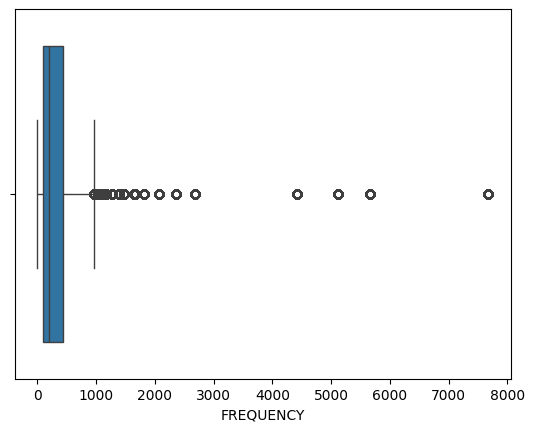

In [72]:
sns.boxplot(x=df['FREQUENCY'])

<Axes: xlabel='TOTAL_REVENUE'>

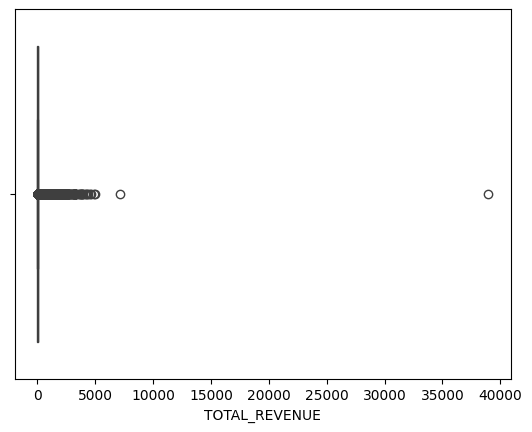

In [73]:
sns.boxplot(x=df['TOTAL_REVENUE'])

<Axes: xlabel='RECENCY'>

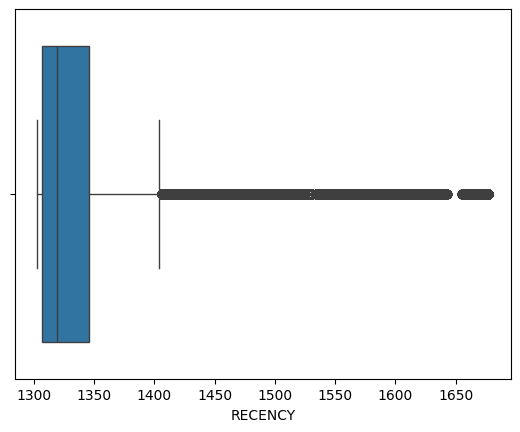

In [74]:
sns.boxplot(x=df['RECENCY'])

## Segmentacion por clusteres.

In [75]:
# Agrupar por 'CUSTOMER_ID' y calcular el gasto total y la cantidad total comprada
customer_data = df.groupby('CUSTOMER_ID').agg({'TOTAL_REVENUE':'sum',
                                                                   'FREQUENCY':'unique',
                                                                   'RECENCY':'unique'}).reset_index()

# Mostrar los primeros registros del DataFrame para verificar
print(customer_data.head())

  CUSTOMER_ID  TOTAL_REVENUE FREQUENCY RECENCY
0       12347        4310.00     [182]  [1305]
1       12348        1797.24      [31]  [1378]
2       12349        1757.55      [73]  [1321]
3       12350         334.40      [17]  [1614]
4       12352        2506.04      [85]  [1339]


In [76]:
def eliminacion_de_parentesis(df):
    df['FREQUENCY']=df['FREQUENCY'].astype('str')
    df['RECENCY']=df['RECENCY'].astype('str')

    df['FREQUENCY'] = df['FREQUENCY'].str.replace('[', '').str.replace(']', '')
    df['RECENCY'] = df['RECENCY'].str.replace('[', '').str.replace(']', '')

    df['FREQUENCY']=pd.to_numeric(df['FREQUENCY'])
    df['RECENCY']=pd.to_numeric(df['RECENCY'])

    return df

customer_data = eliminacion_de_parentesis(customer_data)
customer_data

CUSTOMER_ID  TOTAL_REVENUE  FREQUENCY  RECENCY
0          12347        4310.00        182     1305
1          12348        1797.24         31     1378
2          12349        1757.55         73     1321
3          12350         334.40         17     1614
4          12352        2506.04         85     1339
...          ...            ...        ...      ...
4331       18280         180.60         10     1580
4332       18281          80.82          7     1483
4333       18282         178.05         12     1310
4334       18283        2045.53        721     1306
4335       18287        1837.28         70     1345

[4336 rows x 4 columns]

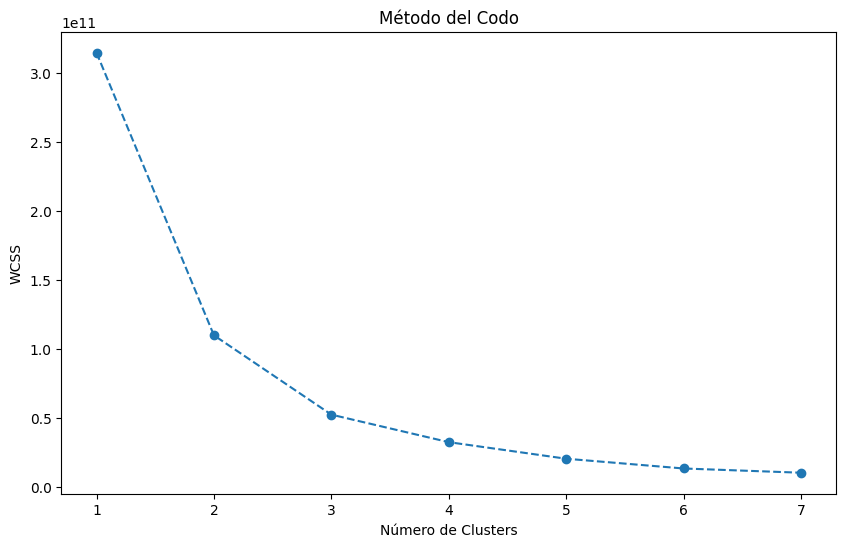

In [77]:
# Seleccionar las características para la segmentación
features = customer_data[['TOTAL_REVENUE', 'FREQUENCY','RECENCY']]

## Estandarizar los datos
#scaler = StandardScaler()
#features_scaled = scaler.fit_transform(features)

# Determinar el número óptimo de clusters utilizando el método del codo con un rango reducido
wcss = []
for i in range(1, 8):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)

# Graficar el método del codo con el rango reducido
plt.figure(figsize=(10, 6))
plt.plot(range(1, 8), wcss, marker='o', linestyle='--')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.show()

In [78]:
K = range(1, 8)
for k in K:
    model = KMeans(n_clusters=k, random_state=12345)
    model.fit(features)
    print('Número de clústeres:', k) 
    print('Valor de la función objetivo', model.inertia_)

Número de clústeres: 1
Valor de la función objetivo 314755846816.4404
Número de clústeres: 2
Valor de la función objetivo 109631165194.39673


Número de clústeres: 3
Valor de la función objetivo 52890511725.02872
Número de clústeres: 4
Valor de la función objetivo 32794640815.156593
Número de clústeres: 5
Valor de la función objetivo 19546419812.261776
Número de clústeres: 6
Valor de la función objetivo 13738516161.6821
Número de clústeres: 7
Valor de la función objetivo 9933672893.110836


In [79]:
# Aplicar K-means con 3 clusters a la muestra de datos
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(features)
print(kmeans.inertia_)


13181751209.579556


In [80]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=['TOTAL_REVENUE','FREQUENCY','RECENCY'])
for i in centroids.columns:
    centroids[i]=centroids[i].astype('int')

In [81]:
# Añade una columna con el número de clúster
customer_data['CLUSTER'] = kmeans.labels_.astype(str)
centroids['CLUSTER'] = ['0 centroid', '1 centroid', '2 centroid','3 centroid','4 centroid', '5 centroid']

# Se necesitará reconfigurar el índice más tarde
data_all = pd.concat([customer_data, centroids], ignore_index=True)

In [82]:
# # Crear una figura con tres subtramas
# fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# # Gráfica 1: TOTAL_REVENUE vs FREQUENCY
# sns.scatterplot(x='TOTAL_REVENUE', y='FREQUENCY', hue='label', data=customer_data_copy, ax=axs[0])
# axs[0].scatter(centroids['TOTAL_REVENUE'], centroids['FREQUENCY'], marker='*', s=200, c='red')
# axs[0].set_title('TOTAL_REVENUE vs FREQUENCY')

# # Gráfica 2: TOTAL_REVENUE vs RECENCY
# sns.scatterplot(x='TOTAL_REVENUE', y='RECENCY', hue='label', data=customer_data_copy, ax=axs[1])
# axs[1].scatter(centroids['TOTAL_REVENUE'], centroids['RECENCY'], marker='*', s=200, c='red')
# axs[1].set_title('TOTAL_REVENUE vs RECENCY')

# # Gráfica 3: FREQUENCY vs RECENCY
# sns.scatterplot(x='FREQUENCY', y='RECENCY', hue='label', data=customer_data_copy, ax=axs[2])
# axs[2].scatter(centroids['FREQUENCY'], centroids['RECENCY'], marker='*', s=200, c='red')
# axs[2].set_title('FREQUENCY vs RECENCY')

# # Mostrar la figura con las tres gráficas
# plt.tight_layout()
# plt.legend(['Clientes nuevos', 'Clientes regulares', 'Clientes frecuentes', 'Clientes importantes','Clientes fieles'])
# plt.show()

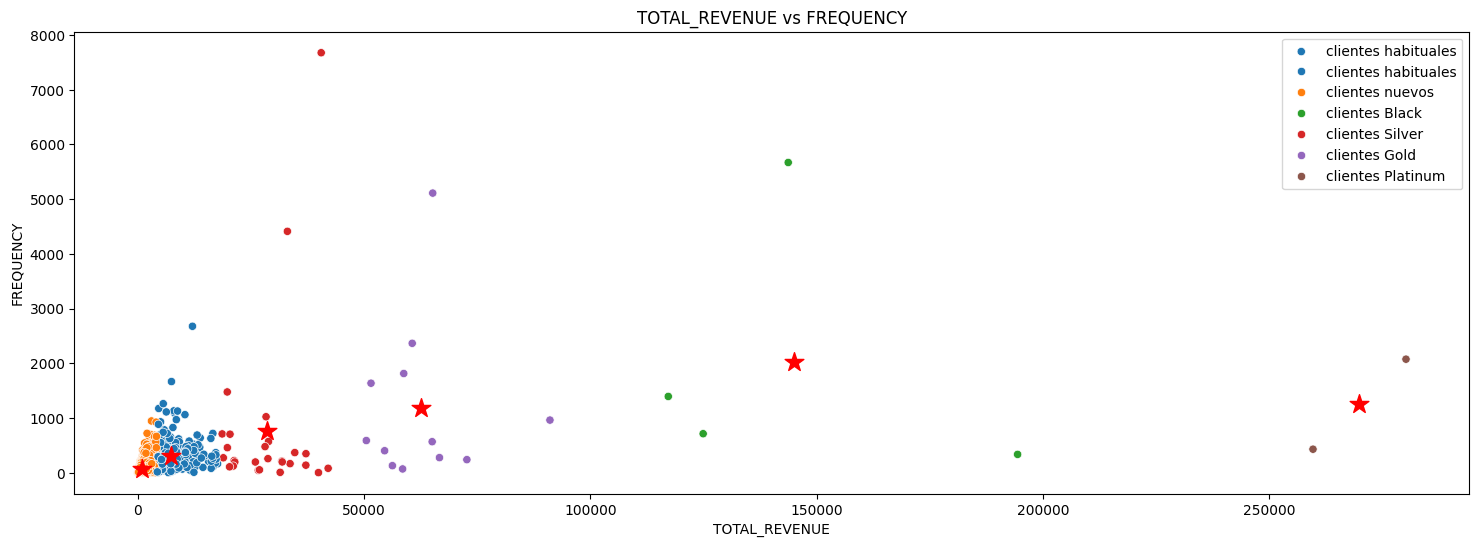

In [83]:
#df.groupby('CUSTOMER_ID')['TOTAL_REVENUE'].sum().sort_values(ascending=False)

fig, axs = plt.subplots(figsize=(18, 6))
sns.scatterplot(x='TOTAL_REVENUE', y='FREQUENCY', hue='CLUSTER', data=customer_data)
axs.scatter(centroids['TOTAL_REVENUE'], centroids['FREQUENCY'], marker='*', s=200, c='red')
axs.set_title('TOTAL_REVENUE vs FREQUENCY')

axs.legend(['clientes habituales', 'clientes habituales', 'clientes nuevos', 'clientes Black', 'clientes Silver', 'clientes Gold', 'clientes Platinum'])
plt.show()

Podemos ver que existen 6 diferentes tipos de clientes (clientes nuevos, habituales, Silver, Gold, Black, y Platinum), estos se determinan por el total del monto y la frecuencia de compras.

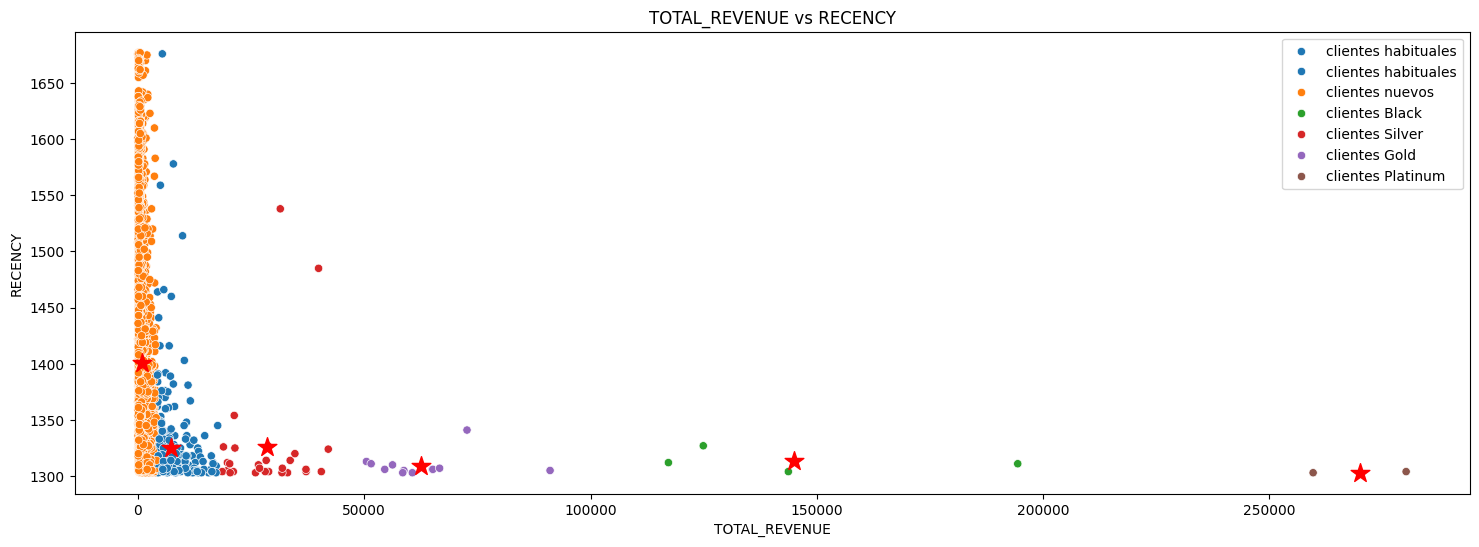

In [84]:
fig, axs = plt.subplots(figsize=(18, 6))
sns.scatterplot(x='TOTAL_REVENUE', y='RECENCY', hue='CLUSTER', data=customer_data)
axs.scatter(centroids['TOTAL_REVENUE'], centroids['RECENCY'], marker='*', s=200, c='red')
axs.set_title('TOTAL_REVENUE vs RECENCY')

axs.legend(['clientes habituales', 'clientes habituales', 'clientes nuevos', 'clientes Black', 'clientes Silver', 'clientes Gold', 'clientes Platinum'])
plt.show()

El grafico anterior nos vuelve a indicar los diferentes tipos de clientes, observamos que las compras de los clientes nuevos no son tan recientes a comparacion de los clientes habituales. La tendencia nos dice que entre mas alta sea tu categoria menor es el tiempo que tardas en volver a consumir.

In [85]:
#PROPONGO DESCARTAR ESTE GRAFICO YA QUE ES DIFICIL DE INTERPRETAR Y PODRIA CONFUNDIR AL ESPECTADOR

# fig, axs = plt.subplots(figsize=(18, 6))
# sns.scatterplot(x='FREQUENCY', y='RECENCY', hue='CLUSTER', data=customer_data)
# axs.scatter(centroids['FREQUENCY'], centroids['RECENCY'], marker='*', s=200, c='red')
# axs.set_title('FREQUENCY vs RECENCY')

# plt.legend(['Clientes ocasionales', 'Clientes habituales', 'Clientes ocasionales', 'Clientes Black','Clientes Silver', 'Clientes Gold'])
# plt.show()

In [86]:
centroids.sort_values('TOTAL_REVENUE')

TOTAL_REVENUE  FREQUENCY  RECENCY     CLUSTER
0            941         63     1401  0 centroid
5           7358        309     1325  5 centroid
3          28461        760     1326  3 centroid
2          62611       1180     1309  2 centroid
1         145056       2028     1313  1 centroid
4         269931       1253     1303  4 centroid

In [87]:
customer_data.sample(20)

CUSTOMER_ID  TOTAL_REVENUE  FREQUENCY  RECENCY CLUSTER
1978       15058        2102.54        266     1328       0
867        13508         110.97         12     1546       0
816        13441         296.64         13     1394       0
485        12981         372.22         20     1332       0
3352       16918        1068.82        128     1352       0
1969       15047         343.62         22     1572       0
3205       16725         758.27        145     1605       0
2611       15900         337.28         47     1326       0
1862       14891         554.38         33     1450       0
3927       17719        5396.04        274     1340       5
2891       16292         302.25         17     1424       0
248        12651         114.00          9     1638       0
735        13324        7121.95         75     1339       5
202        12598        3023.08        132     1312       0
3198       16717        3843.08        198     1326       0
2285       15462         234.60         11     1397       0
588        13124        3756.33        222     1392       0
4248       18170         980.31         38     1336       0
230        12630        1270.88         64     1312       0
67         12430         256.40         11     1346       0

In [112]:
muestras = raw.sample(50, random_state=12345)

In [123]:
# LIBRERIAS PARA CONSTRUIR PIPELINES

from sklearn.pipeline import Pipeline
import warnings



In [124]:
warnings.simplefilter(action='ignore', category=FutureWarning)

def transformacion(raw):
    raw['CUSTOMER_ID'] = raw['CUSTOMER_ID'].astype('object')
    raw['INVOICE_DATE'] = pd.to_datetime(raw['INVOICE_DATE'], format="%d/%m/%Y %H:%M")
    
    raw['DESCRIPTION'] = raw['DESCRIPTION'].replace('?', 'unknown')
    raw['DESCRIPTION'].fillna('unknown', inplace=True)
    raw.drop(df[df['DESCRIPTION']=='unknown'].index,axis=0,inplace=True)

    raw['CUSTOMER_ID'].fillna(0, inplace=True)

    raw = raw.drop_duplicates().reset_index(drop=True)
    raw.drop(raw[raw['QUANTITY'] <= 0]['QUANTITY'].index,axis=0,inplace=True)
    raw.drop(raw[raw['QUANTITY'] > 3000]['QUANTITY'].index,axis=0,inplace=True)

    raw.drop(raw[raw['UNIT_PRICE'] <= 0]['UNIT_PRICE'].index,axis=0,inplace=True)
    raw.drop(raw[raw['UNIT_PRICE'] > 4000]['UNIT_PRICE'].index,axis=0,inplace=True)

    raw['TOTAL_REVENUE'] = raw['QUANTITY'] * raw['UNIT_PRICE']

    raw['YEAR'] = raw['INVOICE_DATE'].dt.year
    raw['MONTH'] = raw['INVOICE_DATE'].dt.month
    raw['DAY'] = raw['INVOICE_DATE'].dt.day
    raw['DAY_OF_WEEK'] = raw['INVOICE_DATE'].dt.day_of_week

    raw['CUSTOMER_ID'] = raw['CUSTOMER_ID'].astype('int')
    raw['CUSTOMER_ID'] = raw['CUSTOMER_ID'].astype('str')

    raw_freq = raw[raw['CUSTOMER_ID']!='0']
    raw_freq.sort_values('INVOICE_NO')
    raw_frequency = raw_freq.groupby(['CUSTOMER_ID'],as_index=False)['INVOICE_NO'].count()
    raw_frequency = raw_frequency.rename(columns={'INVOICE_NO': 'FREQUENCY'})
    raw = raw.merge(raw_frequency, on='CUSTOMER_ID')

    raw_recency = raw.groupby(['CUSTOMER_ID'],as_index=False)['INVOICE_DATE'].max()
    raw_recency['RECENCY'] = (datetime.now() - raw_recency['INVOICE_DATE']).dt.days
    raw = raw.merge(raw_recency, on='CUSTOMER_ID')
    raw.drop(['INVOICE_DATE_y'],axis=1,inplace=True)

    return raw

raw_tran = transformacion(muestras)

In [125]:
muestras.head(10)

INVOICE_NO STOCK_CODE                      DESCRIPTION  QUANTITY  \
118082     546421      21175      GIN + TONIC DIET METAL SIGN         6   
397251     571142      23126        FELTCRAFT GIRL AMELIE KIT        12   
351124     567662      20725          LUNCH BAG RED RETROSPOT         3   
492478     578121      23439       HAND WARMER RED LOVE HEART        12   
3955       536741      22075     6 RIBBONS ELEGANT CHRISTMAS         12   
520988     580306      21169  YOU'RE CONFUSING ME METAL SIGN         12   
492453     578119      22990       COTTON APRON PANTRY DESIGN         2   
27831      538566     72351B   SET/6 PINK  BUTTERFLY T-LIGHTS         2   
156019     550052      21714     CITRONELLA CANDLE GARDEN POT        12   
3134       536602      21071   VINTAGE BILLBOARD DRINK ME MUG         6   

              INVOICE_DATE  UNIT_PRICE CUSTOMER_ID          REGION  
118082 2020-03-13 11:21:00        2.55     13700.0  United Kingdom  
397251 2020-10-14 10:21:00        4.95     14567.0  United Kingdom  
351124 2020-09-21 15:12:00        1.65     17758.0  United Kingdom  
492478 2020-11-23 10:23:00        2.10     14547.0  United Kingdom  
3955   2019-12-02 13:11:00        1.65     13117.0  United Kingdom  
520988 2020-12-02 14:29:00        1.69     14250.0  United Kingdom  
492453 2020-11-23 10:09:00        4.95     17769.0  United Kingdom  
27831  2019-12-13 11:21:00        4.21         0.0  United Kingdom  
156019 2020-04-14 12:00:00        1.25     17068.0  United Kingdom  
3134   2019-12-02 08:34:00        1.06     17850.0  United Kingdom

In [122]:
raw_tran.head(10)

INVOICE_NO STOCK_CODE                      DESCRIPTION  QUANTITY  \
0     546421      21175      GIN + TONIC DIET METAL SIGN         6   
1     571142      23126        FELTCRAFT GIRL AMELIE KIT        12   
2     567662      20725          LUNCH BAG RED RETROSPOT         3   
3     578121      23439       HAND WARMER RED LOVE HEART        12   
4     536741      22075     6 RIBBONS ELEGANT CHRISTMAS         12   
5     580306      21169  YOU'RE CONFUSING ME METAL SIGN         12   
6     578119      22990       COTTON APRON PANTRY DESIGN         2   
7     550052      21714     CITRONELLA CANDLE GARDEN POT        12   
8     536602      21071   VINTAGE BILLBOARD DRINK ME MUG         6   
9     574481      23320     GIANT 50'S CHRISTMAS CRACKER         4   

       INVOICE_DATE_x  UNIT_PRICE CUSTOMER_ID          REGION  TOTAL_REVENUE  \
0 2020-03-13 11:21:00        2.55       13700  United Kingdom          15.30   
1 2020-10-14 10:21:00        4.95       14567  United Kingdom          59.40   
2 2020-09-21 15:12:00        1.65       17758  United Kingdom           4.95   
3 2020-11-23 10:23:00        2.10       14547  United Kingdom          25.20   
4 2019-12-02 13:11:00        1.65       13117  United Kingdom          19.80   
5 2020-12-02 14:29:00        1.69       14250  United Kingdom          20.28   
6 2020-11-23 10:09:00        4.95       17769  United Kingdom           9.90   
7 2020-04-14 12:00:00        1.25       17068  United Kingdom          15.00   
8 2019-12-02 08:34:00        1.06       17850  United Kingdom           6.36   
9 2020-11-04 12:45:00        2.89       18022  United Kingdom          11.56   

   YEAR  MONTH  DAY  DAY_OF_WEEK  FREQUENCY  RECENCY  
0  2020      3   13            4          1     1574  
1  2020     10   14            2          1     1359  
2  2020      9   21            0          1     1382  
3  2020     11   23            0          1     1319  
4  2019     12    2            0          1     1676  
5  2020     12    2            2          1     1310  
6  2020     11   23            0          1     1319  
7  2020      4   14            1          1     1542  
8  2019     12    2            0          1     1676  
9  2020     11    4            2          1     1338

# Entrenamiento de modelos.

### K-means
**Análisis y Segmentación de Clientes**:

Clustering: Utilizar algoritmos de clustering (como K-Means) para segmentar a los clientes en diferentes grupos basados en su comportamiento de compra (frecuencia, monto gastado, recencia de compras, etc.).

RFM Analysis: Utilizar un modelo de Recencia, Frecuencia y Valor Monetario (RFM) para clasificar a los clientes en categorías como 'clientes frecuentes', 'clientes esporádicos', y 'clientes nuevos'.

1. **Sistemas de Recomendación**:
    - **Collaborative Filtering**: Utilizar técnicas de filtrado colaborativo para recomendar productos a clientes basados en las compras de clientes similares.
    - **Content-Based Filtering**: Recomendaciones basadas en las características del producto y el historial de compras del cliente.

2. **Personalización de Promociones**:
    - Crear un sistema de reglas para asignar promociones específicas a cada segmento de clientes. Por ejemplo, clientes frecuentes podrían recibir descuentos en productos populares, mientras que clientes nuevos podrían recibir promociones para incentivar su segunda compra.

### Clasificacion binaria
1. **Churn Prediction**:
    - Predecir qué clientes están en riesgo de abandonar y crear estrategias de retención para estos clientes.

# Reporte de resultados